In [6]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.plotting import add_color_labels_w_rep

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2018-10-09 
Git hash: 42b50b2bae7773307f49194899ffbeb2475982b9


In [3]:
zscores = pd.read_parquet('../output/scrnaseq-wf/tpm_zscore_w_rep.parquet', columns=nbconfig.sel_cluster_order_w_rep)
zscores.index = zscores.index.map(nbconfig.fbgn2symbol)

In [20]:
genes = [
    'mof',
    'msl-1',
    'msl-2',
    'msl-3',
    'roX1',
    'roX2',
]
dat = zscores.loc[genes]

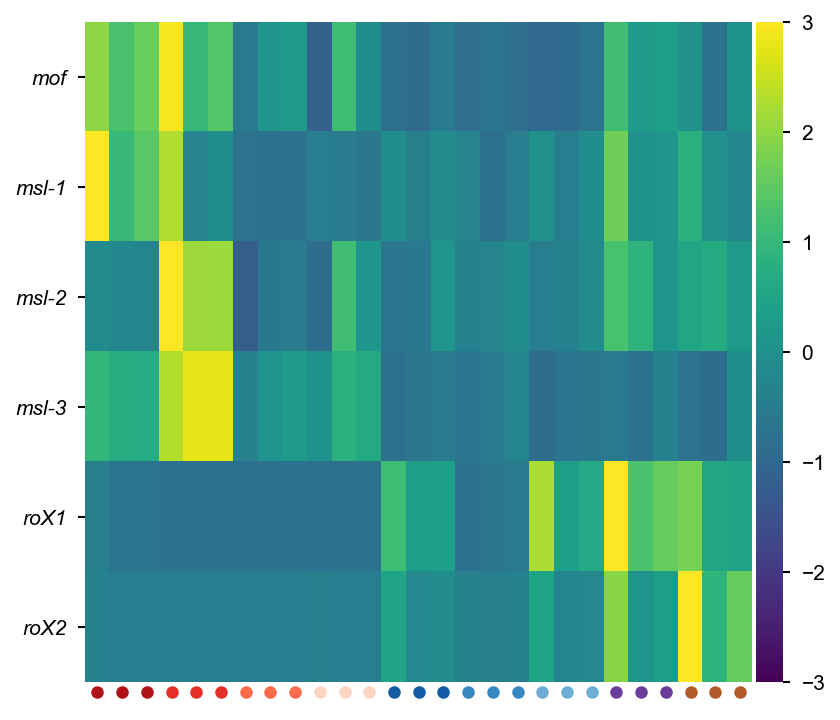

In [21]:
fig = plt.figure()
gs = GridSpec(2, 2, width_ratios=[1, .04], height_ratios=[1, .03], hspace=0, wspace=.01)
axMain = fig.add_subplot(gs[0, 0])
axLabel = fig.add_subplot(gs[1, 0])
axCbar = fig.add_subplot(gs[0, 1])

sns.heatmap(
    dat, 
    cmap='viridis', 
    vmin=-3, vmax=3, 
    xticklabels=False, yticklabels=True,
    ax=axMain, 
    cbar_ax=axCbar,
)
add_color_labels_w_rep(axLabel)
plt.setp(axMain.get_yticklabels(), rotation=0, fontstyle='italic');
axMain.set_ylabel('');
fig.savefig('../output/2018-10-09_heatmap_dosage_compensation.svg', bbox_inches='tight')